# <center>  Python for biologists
    
## HW11, Data Analysis

### Правила

- Не создавайте доп. веток в репозитории, не копируйте ноутбук.
- Пишите код только там, где это от вас требуется (`# YOUR CODE HERE`)
- Используйте разобранный нами функционал, решения через циклы, `Counter` и т.п. засчитываться не будут.
- Перед отправкой проверьте что ваш ноутбук работает (юпитер-ноутбук). Нажмите на панели сверху `Kernel` -> `Restart Kernel and Run All Cells...`. Проверье что нет ошибок.
    

#### Погнали!

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# здесь любые импорты которые вам еще понадобятся (только здесь)

# Продвинутая работа с одним дата-фреймом  </br> на примере биомедицинских данных

Мы будем работать с фармакокинетическим Варифариновым датасетом `warfarin.csv` (конкретный пример взят [отсюда](https://insightrx.github.io/PKPDsim/reference/pkdata.html?q=pkdata), но почитать можно [тут](https://dataset.lixoft.com/data-set-examples/warfarin-data-set/) и [тут](https://ascpt.onlinelibrary.wiley.com/doi/10.1038/clpt.2010.37/)). 

Датасет содержит следующие колонки:
- `ID` - Идентификатор пациента
- `Time` - Время внесения записи
- `WT` - Вес пациента
- `AGE` - Возраст пациента
- `SEX` - Пол пациента
- `CRCL` - Клиренс креатинина пациента (показатель работоспособности почек)
- `EVID` - Event ID - флаг который обозначает тип события: 1 - администрирование (введение) дозы варфарина, 0 - запись концентрации варфарина в крови
- `AMT` - Amount, Доза варфарина которая была дана пациенту
- `DV` - Зависимая переменная в анализе, концентрация варфарина в крови

Соотвественно про данные история такая, что не может быть одновременной записи DV и AMT. Мы либо даем дозу, либо измеряем концентрацию - не одновременно. Это и обозначает флаг EVID.  Поэтому если в DV стоит 0 - это не значит что концентрация 0, скорее всего эта запись отмечена флагом EVID 1, то мы и не знаем концентрацию, мы её не измеряли. 




In [2]:
warfarin = pd.read_csv('data/warfarin.csv', sep='\t')

### Задание 1 📈 

Сколько в среднем имеется записей на пациента? 


*(5 баллов)*

In [3]:
result = warfarin.groupby('ID').size().mean()

In [4]:
assert result == 13.0

### Задание 2 📈 

Выведите средний возраст всех пациентов. 


*(5 баллов)*

In [5]:
result = warfarin.AGE.mean()

In [6]:
assert np.isclose(result, 53.0883, atol=1e-3)

### Задание 3 📈 

Выведите в виде списка имена колонок, где у каждого пациента значения не меняются


*(5 баллов)*

In [7]:
result = warfarin.groupby('ID').nunique().eq(1).all(axis=0)
result = result[result].index.to_list()

In [8]:
assert result == ['WT', 'CRCL', 'AGE', 'SEX']

### Задание 4 📈 

Постройте [Spaghetti plot](https://en.wikipedia.org/wiki/Spaghetti_plot) DV vs TIME по каждому ID, отметьте вертикальными линиями моменты времени когда вводилась доза. Референсный график приеден в файле `spaghetti_plot.png`.  Обратите внимание, что на референсе `DV` не "проваливается" до 0. Почему?

Легенду по цветами выводить не надо :)

*(15 баллов)*

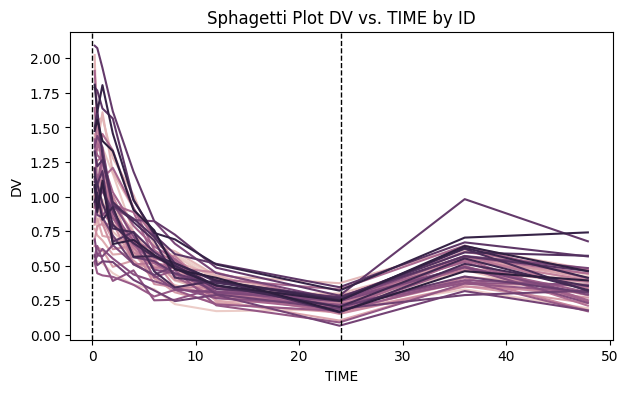

In [9]:
fig = plt.figure(figsize=(7, 4))
sns.lineplot(data=warfarin.query('DV > 0'), x='TIME', y='DV', hue='ID', legend=None)
for time in warfarin.query('DV == 0').TIME.unique():
    plt.axvline(time, color='k', linestyle='--', linewidth=1)
plt.title('Sphagetti Plot DV vs. TIME by ID');

> Ну а далее ученые-фармакометрики строят по этим графикам математические модели (нелинейные) чтобы уметь описывать фармакокинетический профиль концентрации лекарства в крови, учитывать влияние пола / веса / генотипа / ... человека, и в конце-концов, предсказывать ту самую оптимальную дозу для конкретного пациента. Таргетная терапия! Но это уже совсем другая история.

# Продвинутая работа с несколькими дата-фреймами  </br> на примере биоинформатических данных

Мы будем работать со следующими омиксными данными:
- RNA-seq малых РНК из нейронов здорового человека и пациента с некоторым нейродегенеративным заболеванием
- ChIP-seq'и за белки 'CTCF' и 'SMC3' (они в том числе отвечают за структуру хроматина и экспрессию генов)

Все это лежит в папке `data`

### Задание 6 📈 Подготовка данных


##### 1) Прочитайте данные в 3 датафрема `ctcf`, `smc3` и `rnaseq`. Для этого вам понадобится:
- Понять названия колонок (про форматы данных можно почитать [тут](https://genome.ucsc.edu/FAQ/FAQformat.html))
- Понять как прочитать BigWig данные (они бинарные). Существует библиотека `pyBigWig`, но она хранит датасеты в очень странном фармате, в данной домашке ЗАПРЕЩАЕТСЯ её использовать. Сконвертируйте в коммандной строке BigWig в bedGraph и читайте bedGraph в pandas-dataframe.
- Прочитав два дата-фрейма для РНК-сека вам нужно объединить их в один дата-фрейм добавив колонку обозначающую тип образца



##### 2) Создайте датафрейм с аннотацией генома человека версии GRCh38.p13. Для этого вам понадобится:
- Найти эту аннотацию. Я советую формат `gff3`.
- Файл будет очень большой, советую предобработать его в командной строке:
    - Отобрать только нужные колонки
    - Отобрать только записи соответвующие генам
    - (Если компьютер слабый) отобрать только записи соответствующие 15 хромосоме.
- Прочитать это дело в pandas-data frame
- Имя гена находится в последней колонке gff3, где много полей аггрегированы через `;`. Вам нужно:
    - Найти как называется нужное поле, где лежит имя гена.
    - Достать имя гена в отдельную колонку (например `gene` или `gene_name`). </br>
    Достать имя гена может быть не очень тривиально. Можно сделать это в баше, можно сделать это в питоне. Тут на ваше усмотрение. В питоне по-сути у вас есть колонка с кучей информации в виде строки откуда вам нужно что-то достать. Ровно для этого мы и разобрали [ацессор `str`](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)! Могу предложить 2 пути:
        - (Попродвинутее)  Используйте `str.replace` с параметром `regex=True`. Не зря же мы учили регексы!
        - (Попроще) Используйте `str.split` чтобы отрезать ненужное и вырезать нужное
        
        
##### 3) Во всех датафреймах оставьте только нужные колонки
    Это колонки с хромосомой, координатами начала и конца, цепью +/-, значением сигнала (для ChIP-seq и RNA-seq) и именем гена (для аннотации)


> Да, обрабатывать готовые данные в питоне легко, но перед любым анализом всегда есть мучительный процесс поиска и подготовки.  Ведь реальный анализ всегда начинается с этого. Теперь вы будете во всеоружии!:)

*(15 баллов)*

In [10]:
### ChIP-seq ###
narrow_peak_colnames = ('chr', 'start', 'stop', 'name', 'score', 'strand', 
                        'signalValue', 'pValue', 'qValue', 'peak')
ctcf = pd.read_csv('data/CTCF_neurons.bigNarrowPeak', sep='\t', header=None, names=narrow_peak_colnames)
smc3 = pd.read_csv('data/SMC3_neurons.bigNarrowPeak', sep='\t', header=None, names=narrow_peak_colnames)


### RNA-seq ###
bedgraph_colnames = ('chr', 'start', 'stop', 'signalValue')
rnaseq_hc = pd.read_csv('data/SmallRNAseq_health.bedGraph', sep='\t', header=None, names=bedgraph_colnames)
rnaseq_de =  pd.read_csv('data/SmallRNAseq_desease.bedGraph', sep='\t', header=None, names=bedgraph_colnames)

# Объединить можно двумя способами
# В 1 строку - с параметром keys
rnaseq = pd.concat([rnaseq_hc, rnaseq_de], 
                   keys=('Health', 'Desease'), 
                   names=['Sample']).reset_index('Sample')
# В 3 строчки - предсоздав колонку
rnaseq_hc['Sample'] = 'Health'
rnaseq_de['Sample'] = 'Desease'
rnaseq = pd.concat([rnaseq_hc, rnaseq_de])


### Аннотация ####
gff_colnames = ('chr', 'DB', 'type', 'start', 'stop', 'strand', 'data')
genes = pd.read_csv('data/genes.tsv', sep='\t', header=None, skiprows=7, names=gff_colnames)
genes = genes.query('chr=="chr15"').query('type=="gene"')
genes['gene'] = genes['data'].str.extract(r'gene_name=([^;]+)', expand=False)
genes = genes[['chr',  'start', 'stop', 'strand', 'gene']]
genes = genes.drop_duplicates()

# Учитываем что начало гена зависит от его цепи!!!
genes[['start', 'stop']] = genes.apply(lambda x: (x.start, x.stop) if x.strand == '+' else (x.stop, x.start), 
                                       axis=1, result_type='expand')

### Задание 7 📈 Аннотация

1) Возьмите данные ChIP-seq и аннотацию. Для экономии ресурсов отберите только 15 хромосому.
2) Смерджте дата-фреймы ChIP-seq так чтобы получить набор только пересекающихся пиков
3) Обработайте смердженный датафрейм: 
    - Создайте колонки `start` и `stop` которые будут отмечать координаты объединения двух пиков (то есть самое левое начало и самый правый конец)
    - Отберите топ 100 записей по суммарной интенсивности сигналов CTCF и SMC3 
    - Отберите только нужные колонки: хромосома, `start` и `stop`, интенсивности сигналов
    
    </br>

4) Добавьте аннотацию. 
    - Смерджьте датафрейм пиков с датафремом аннотации.
    - Отберите только те пики, которые покрывают НАЧАЛО какого-то гена (т.к. регуляция экспрессии обычно происходит в начале гена, нам интересно посмотреть на началах каких генов сидят CTCF и SMC3
    - Напечатайте этот датафрейм.

    </br>

5) Биоинформатика... </br>
    А теперь, если бы это были ваши данные, вы бы пошли гуглить, что же за гены оказались потенциально под очень сильным влиянием одновременно и CTCF и SMC3. Но это уже совсем другая история.


*(30 баллов)*

In [11]:
## Объединяем: 2 варианта ##
ctcf = ctcf.query('chr=="chr15"')
smc3 = smc3.query('chr=="chr15"')

# Через библиотеку, например, bioframe
import bioframe as bf
ctcf_bf = ctcf.rename({'stop':'end', 'chr':'chrom'}, axis=1) # в bioframe ожидаются
smc3_bf = smc3.rename({'stop':'end', 'chr':'chrom'}, axis=1) # конкретные имена колонок
merged = bf.overlap(ctcf_bf, smc3_bf, how='inner', suffixes=('_x','_y'))
merged['chrom'] = merged['chrom_x']

# Через обычный pandas merge
merged = smc3.merge(ctcf, on='chr').query('(start_x <= start_y <= stop_x) or' + 
                                          '(start_x <= stop_y <= stop_x) or ' +
                                          '(start_y <= start_x <= stop_y) or' +
                                          '(start_y <= stop_x <= stop_y)')

## Сохраняем новые границы ##
merged['start'] = merged[['start_x', 'stop_x', 'start_y', 'stop_y']].min(axis=1)
merged['stop'] = merged[['start_x', 'stop_x', 'start_y', 'stop_y']].max(axis=1)

## Отбираем топ 100 ##
merged = merged.loc[(merged.signalValue_x + merged.signalValue_y).nlargest(100).index, 
                    ['chr',  'start', 'stop']]

## Добавляем аннотацию генов ##
merged.merge(genes, on='chr', how='left') \
      .query('start_x <= start_y <= stop_x')\
      .sort_values(by=['start_x', 'stop_x', 'start_y', 'stop_y'])

,chr,start_x,stop_x,start_y,stop_y,strand,gene
149233,chr15,34209876,34210512,34210096,34140674,-,KATNBL1
171438,chr15,34342915,34343564,34343136,34341719,-,NOP10
171439,chr15,34342915,34343564,34343315,34357737,+,NUTM1
127145,chr15,40217070,40217730,40217428,40277487,+,PAK6
93892,chr15,40893918,40894580,40894450,40903975,+,VPS18
74050,chr15,44663440,44664131,44663688,44554818,-,SPG11
131920,chr15,50908237,50908959,50908603,50839875,-,CTD-2378E12.1
131921,chr15,50908237,50908959,50908672,51005895,+,AP4E1
214133,chr15,55196804,55197473,55197049,55180806,-,RSL24D1
110074,chr15,66497545,66498259,66497780,66490135,-,SNAPC5


### Задание 8 📈 Статистическое сравнение данных

 Данные у вас хранятся в агрегированном виде (координаты сжаты до начал и концов интервалов). В связи с этим невозможно делать статистическое сравнение сигналов, так как, условно, какой-то сигнал задан на интервале в 100 п.н., а какой-то в 1000 п.н.. Поэтому данные придется немного предобработать. 

1) Возьмите данные RNA-seq. Для экономии ресурсов отберите только 15 хромосому.
2) Переведите датафрейм `['chr', 'start', 'stop', 'signalValue']` в `['chr', 'pos', 'signalValue']`, то есть чтобы у вас каждая позиция была записана в явном виде. 

Было:
```python
start stop signal
1     2    10
4     6    100
```
Стало:
```python
pos signal
1    10
2    10
4    100
5    100
6    100
```

Сделать можно разными путями. Я могу посоветовать например [такое](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html). Для этого нужно иметь одну колонку где все нужные координаты из интервала будут записаны в виде списка (все, а не только начало и конец). Я думаю, что проще всего это будет сделать с помощью `apply` (мы же умеем применять его к строкам) и старого доброго `range` :)


3) Статистически интенсивности сигналов РНК-сека на хромосоме 15 между двумя группами образцов. Следите чтобы ваши выводы были корректными.

#### Самый главный график

4) Нарисуйте 2 боксполта интенсивностей сигналов РНК-сека (в log-шкале по y) и проаннотируйте над ними p-value. Если вызывает трудности, начните [отсюда](https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values). Можете найти референс в файле `boxplot.png`


*(25 баллов)*

In [12]:
import pingouin as pg

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-32.906593,132789.194258,two-sided,1.595899e-236,"[-75.02, -66.58]",0.123157,1.827e+232,1.0


Text(0, 0.5, 'RNA-seq signal')

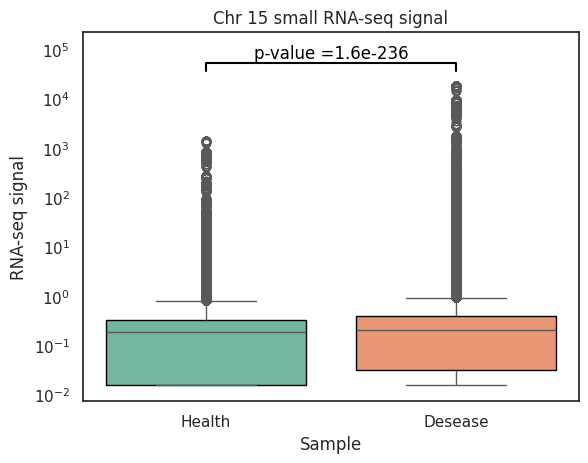

In [13]:
rnaseq = rnaseq.query('chr == "chr15"')

# Получаем позиции
rnaseq['position'] = rnaseq.apply(lambda row: list(range(row['start'], row['stop']+1)), axis=1)
rnaseq = rnaseq.explode('position')

# Любой стат.тест который вам покажется релевантным
ttset_res = pg.ttest(rnaseq.query('Sample == "Health"').signalValue, 
                     rnaseq.query('Sample == "Desease"').signalValue)
display(ttset_res)

### Боксплоты ###
# Общие настройки
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette('Set2')

# Сам график
sns.boxplot(rnaseq, y='signalValue', x='Sample', hue='Sample',
            boxprops={'edgecolor':'k'})

# Аннотация p-value
x1, x2 = 0, 1
max_ = rnaseq['signalValue'].max()
range_ = rnaseq['signalValue'].max() - rnaseq['signalValue'].min()
y, h, col = max_ + range_, range_, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"p-value ={ttset_res['p-val']['T-test']:.2g}", ha='center', va='bottom', color=col);

# Расставляем y-ticks
plt.yscale('log')
ylims = plt.gca().get_ylim()
plt.ylim((ylims[0], ylims[1]*2))

# Подписи графика
plt.title('Chr 15 small RNA-seq signal')
plt.xlabel('Sample')
plt.ylabel('RNA-seq signal')

> Получается, мы показали наличие или отсутствие разницы в экспрессии малых РНК в нейронах между здоровыми людьми и пациентами с некоторым нейродегенеративным заболеванием. Осталось найти статьи чтобы проследить связь этих РНК с функциями некоторых конкретных генов и белков - и пожалуйста, у вас уже есть готовые наметки чтобы выстраивать патоэтиологию заболевания. Но это уже совсем другая история.

---

Надеюсь, у тебя всё получилось! Но в любом случае - ты молодец:)🥳

---